In [637]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [638]:
dataset = pd.read_csv("MOBILE_MONEY.csv")

In [639]:
dataset.head()

,CASHIN,CASHOUT,P2P_RECU,MERCHPAY,P2P,RC,P2PNONREG,BILLPAY,ca_CASHIN,ca_CASHOUT,ca_P2P_RECU,ca_MERCHPAY,ca_P2P,ca_RC,ca_P2PNONREG,ca_BILLPAY,id
0,18,20,6,1,1,17,0,0,135900,93400,35600,1000,83000,3500,0,0,1
1,3,4,5,0,4,19,0,0,25000,24000,12500,0,7500,5450,0,0,2
2,0,1,9,0,5,8,0,0,0,4500,39200,0,28600,5950,0,0,3
3,8,5,3,0,5,2,1,0,93000,64000,36500,0,45000,3700,15000,0,4
4,3,5,5,0,2,20,0,0,53000,45800,19300,0,7100,18450,0,0,5


In [640]:
#etat des lieux des donnees
dataset.describe()

,CASHIN,CASHOUT,P2P_RECU,MERCHPAY,P2P,RC,P2PNONREG,BILLPAY,ca_CASHIN,ca_CASHOUT,ca_P2P_RECU,ca_MERCHPAY,ca_P2P,ca_RC,ca_P2PNONREG,ca_BILLPAY,id
count,368483.000000,368483.000000,368483.000000,368483.000000,368483.000000,368483.000000,368483.000000,368483.000000,3.684830e+05,3.684830e+05,3.684830e+05,3.684830e+05,3.684830e+05,3.684830e+05,3.684830e+05,3.684830e+05,368483.000000
mean,3.903295,3.813101,3.769550,0.191748,3.525414,9.720649,0.216640,0.120402,1.152163e+05,9.201058e+04,1.581621e+05,6.300363e+03,1.656961e+05,5.906972e+03,5.213081e+03,1.358736e+03,184242.000000
std,5.417332,4.961280,5.989219,1.398838,6.834132,14.706043,1.259457,0.619706,4.788079e+05,3.673015e+05,3.092602e+06,1.718303e+05,6.656508e+06,1.641018e+04,7.901467e+04,1.491085e+04,106372.023958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+03,3.000000e+03,1.500000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,92121.500000
50%,2.000000,2.000000,2.000000,0.000000,1.000000,3.000000,0.000000,0.000000,2.000000e+04,2.100000e+04,1.605000e+04,0.000000e+00,5.150000e+03,8.500000e+02,0.000000e+00,0.000000e+00,184242.000000
75%,5.000000,5.000000,5.000000,0.000000,4.000000,14.000000,0.000000,0.000000,7.700000e+04,7.250000e+04,6.500000e+04,0.000000e+00,4.810000e+04,5.400000e+03,0.000000e+00,0.000000e+00,276362.500000
max,86.000000,82.000000,90.000000,85.000000,90.000000,90.000000,73.000000,45.000000,2.559000e+07,2.411700e+07,7.477880e+08,2.701396e+07,2.280658e+09,1.297300e+06,2.062732e+07,3.835243e+06,368483.000000


# On a divise les variables en 3 familles : les virements, les transferts et les paiements

In [641]:
# somme des variables de CA de virement pour chaque client
dataset["ca_virement"] = dataset["ca_CASHIN"] + dataset["ca_CASHOUT"]
# somme des variables de CA de transfert pour chaque client
dataset["ca_transfert"] = dataset["ca_P2P_RECU"] + dataset["ca_P2PNONREG"] + dataset["ca_P2P"]
#somme des variables de CA de paiement pour chaque client
dataset['ca_paiement'] = dataset['ca_MERCHPAY'] + dataset['ca_RC'] + dataset['ca_BILLPAY']
#somme de CA de toutes les transactions de chaque client
dataset['CA'] = dataset['ca_CASHIN'] + dataset['ca_CASHOUT'] + dataset['ca_P2P_RECU']+ dataset['ca_MERCHPAY']+ dataset['ca_P2P']+ dataset['ca_RC']+ dataset['ca_P2PNONREG']+ dataset['ca_BILLPAY']

In [642]:
df = dataset

In [643]:
# somme des variables de virement pour chaque client
df["virement"] = df["CASHIN"] + df["CASHOUT"]
# somme des variables de transfert pour chaque client
df["transfert"] = df["P2P_RECU"] + df["P2PNONREG"] + df["P2P"]
#somme des variables de paiement pour chaque client
df['paiement'] = df['MERCHPAY'] + df['RC'] + df['BILLPAY']
#somme de toutes les transactions de chaque client
df['NCA'] = df['CASHIN'] + df['CASHOUT'] + df['P2P_RECU']+ df['MERCHPAY']+ df['P2P']+ df['RC']+ df['P2PNONREG']+ df['BILLPAY']

In [644]:
df.head()

,CASHIN,CASHOUT,P2P_RECU,MERCHPAY,P2P,RC,P2PNONREG,BILLPAY,ca_CASHIN,ca_CASHOUT,...,ca_BILLPAY,id,ca_virement,ca_transfert,ca_paiement,CA,virement,transfert,paiement,NCA
0,18,20,6,1,1,17,0,0,135900,93400,...,0,1,229300,118600,4500,352400,38,7,18,63
1,3,4,5,0,4,19,0,0,25000,24000,...,0,2,49000,20000,5450,74450,7,9,19,35
2,0,1,9,0,5,8,0,0,0,4500,...,0,3,4500,67800,5950,78250,1,14,8,23
3,8,5,3,0,5,2,1,0,93000,64000,...,0,4,157000,96500,3700,257200,13,9,2,24
4,3,5,5,0,2,20,0,0,53000,45800,...,0,5,98800,26400,18450,143650,8,7,20,35


# Traitement des valeurs extremes en se basant sur les totaux de CA et des transactions

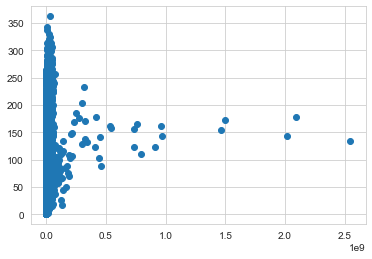

In [645]:
plt.scatter(df['CA'],df['NCA'])

In [646]:
df_num = np.array(df)

In [647]:
meanNCA = np.mean(df_num[:,-1], axis=0)
sdNCA = np.std(df_num[:,-1], axis=0)
meanCA = np.mean(df_num[:,20], axis=0)
sdCA = np.std(df_num[:,20], axis=0)

In [648]:
#Suppression des valeurs extremes et mauvais clients
df[df.CA > meanCA - 2*sdCA]
df = df[df.CA < meanCA + 2*sdCA]
df[df.NCA > meanNCA - 2*sdNCA]
df = df[df.NCA < meanNCA + 2*sdNCA]

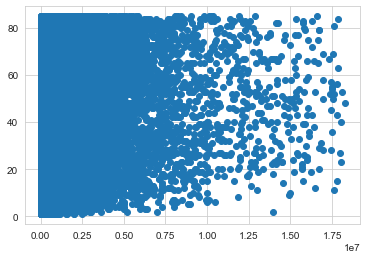

In [649]:
plt.scatter(df['CA'],df['NCA'])

In [650]:
#Creating the Clusters
#On va choisir K-Means pour generer des segments homogens

In [651]:
from sklearn.cluster import KMeans

In [652]:
kmeans = KMeans(n_clusters=8,max_iter=100)
kmeans.fit_predict(df[['paiement','virement','transfert']])
print(kmeans.cluster_centers_)
df['cluster'] = kmeans.labels_

[[ 2.13073376  9.93880591  6.41736043]
 [44.97103807 10.93532379  9.6877644 ]
 [ 1.03823345  2.25147965  1.68247115]
 [ 9.18170267 26.27398348 10.28811944]
 [29.33534163 17.11414195 20.59507415]
 [ 9.34311733 12.05951703 26.60712253]
 [11.56463286  5.94051178  5.35690867]
 [23.95794213  9.27489442  7.79117657]]


In [653]:
df_kmeans = pd.DataFrame(kmeans.cluster_centers_)

In [654]:
#Calcule de la moyenne et l'ecart type de chaque famille

In [655]:
df_kmeans = df_kmeans.rename(columns={0:'ctr_nbr_paiement', 1:'ctr_nbr_virement',2:'ctr_nbr_transfert'})
df_kmeans.describe()

,ctr_nbr_paiement,ctr_nbr_virement,ctr_nbr_transfert
count,8.000000,8.000000,8.000000
mean,16.440343,11.723582,11.053250
std,15.145092,7.308045,8.347897
min,1.038233,2.251480,1.682471
25%,7.418960,8.441299,6.152247
50%,10.453875,10.437065,8.739470
75%,25.302292,13.323173,12.864858
max,44.971038,26.273983,26.607123


# Creation des profils pour chaque famille a partir de la difference entre la moyenne et l'ecart type

In [656]:
df.loc[df['paiement'] > df_kmeans['ctr_nbr_paiement'].mean()+df_kmeans['ctr_nbr_paiement'].std(), 'profil_paiement']='high'
df.loc[df['paiement'] < df_kmeans['ctr_nbr_paiement'].mean()-df_kmeans['ctr_nbr_paiement'].std(), 'profil_paiement']='low'
df.loc[df['paiement'].isna(), 'profil_paiement']='medium'
df = df.replace(np.nan, 'medium', regex=True)

In [657]:
df.loc[df['virement'] > df_kmeans['ctr_nbr_virement'].mean()+df_kmeans['ctr_nbr_virement'].std(), 'profil_virement']='high'
df.loc[df['virement'] < df_kmeans['ctr_nbr_virement'].mean()-df_kmeans['ctr_nbr_virement'].std(), 'profil_virement']='low'
df.loc[df['virement'].isna(), 'profil_virement']='medium'
df = df.replace(np.nan, 'medium', regex=True)

In [658]:
df.loc[df['transfert'] > df_kmeans['ctr_nbr_transfert'].mean()+df_kmeans['ctr_nbr_transfert'].std(), 'profil_transfert']='high'
df.loc[df['transfert'] < df_kmeans['ctr_nbr_transfert'].mean()-df_kmeans['ctr_nbr_transfert'].std(), 'profil_transfert']='low'
df.loc[df['transfert'].isna(), 'profil_transfert']='medium'
df = df.replace(np.nan, 'medium', regex=True)

# Ajout d'une colonne des segments

In [659]:
df.loc[(df['profil_paiement']!='low')&(df['profil_virement']!='low')&(df['profil_transfert']!='low'),'Segment']='S1'
df.loc[(df['profil_paiement']=='low')&(df['profil_virement']=='low')&(df['profil_transfert']=='low'),'Segment']='S2'
df.loc[(df['profil_paiement']=='high')&(df['profil_virement']!='high')&(df['profil_transfert']!='high'),'Segment']='S3'
df.loc[(df['profil_paiement']!='high')&(df['profil_virement']=='high')&(df['profil_transfert']!='high'),'Segment']='S4'
df.loc[(df['profil_paiement']!='high')&(df['profil_virement']!='high')&(df['profil_transfert']=='high'),'Segment']='S5'
df = df.replace(np.nan, 'S6', regex=True)

In [660]:
df

,CASHIN,CASHOUT,P2P_RECU,MERCHPAY,P2P,RC,P2PNONREG,BILLPAY,ca_CASHIN,ca_CASHOUT,...,CA,virement,transfert,paiement,NCA,cluster,profil_paiement,profil_virement,profil_transfert,Segment
0,18,20,6,1,1,17,0,0,135900,93400,...,352400,38,7,18,63,3,medium,high,medium,S4
1,3,4,5,0,4,19,0,0,25000,24000,...,74450,7,9,19,35,7,medium,medium,medium,S1
2,0,1,9,0,5,8,0,0,0,4500,...,78250,1,14,8,23,6,medium,low,medium,S6
3,8,5,3,0,5,2,1,0,93000,64000,...,257200,13,9,2,24,0,medium,medium,medium,S1
4,3,5,5,0,2,20,0,0,53000,45800,...,143650,8,7,20,35,7,medium,medium,medium,S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368478,1,1,0,0,0,0,0,0,5000,4850,...,9850,2,0,0,2,2,low,low,low,S2
368479,4,7,17,0,2,33,0,0,11000,764000,...,1778450,11,19,33,63,4,high,medium,medium,S3
368480,7,3,16,0,8,25,0,0,76000,21500,...,384950,10,24,25,59,4,medium,medium,high,S5
368481,4,3,1,0,2,7,0,0,26000,18500,...,58100,7,3,7,17,6,medium,medium,medium,S1


# Pourcentage de chaque segment

In [661]:
df['Segment'].value_counts(normalize=True)*100

S6    40.573825
S2    26.546048
S1    21.927823
S3     4.017517
S4     3.620580
S5     3.314208
Name: Segment, dtype: float64

In [636]:
# S1 à fidéliser
# S2 à encourager
# S3 à developper les familles de virement et transfert
# S4 à developper les familles de paiement et transfert
# S5 à developper les familles de virement et paiement
# S6 le reste